In [19]:
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['Automobile price data (Raw)']
frame = ds.to_dataframe()

In [20]:
frame

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [21]:
import pandas as pd
import numpy as np
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']
for column in cols:
    frame.loc[frame[column] == '?', column] = np.nan
for col in cols:
    frame[col] = pd.to_numeric(frame[col])
    frame.dropna(axis = 0, inplace = True)
print('dimensions = ' + str(frame.shape))
print(frame.dtypes)

dimensions = (195, 26)
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


In [22]:
def describe(df, col):
    desc = df[col].describe()
    idx = desc.index.tolist()
    idx[5] = 'median'
    desc.index = idx
    return desc

In [23]:
describe(frame, 'price')

count       195.000000
mean      13248.015385
std        8056.330093
min        5118.000000
25%        7756.500000
median    10245.000000
75%       16509.000000
max       45400.000000
Name: price, dtype: float64

In [24]:
def plotstats(df, col):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(2, 1, figsize = (12,8))
    df.dropna().boxplot(col, ax = ax[0], vert = False, return_type = 'dict')
    temp = df[col].as_matrix()
    ax[1].hist(temp, bins = 30, alpha = 0.7)
    plt.ylabel('Number of Cars')
    plt.xlabel(col)
    return[col]

['price']

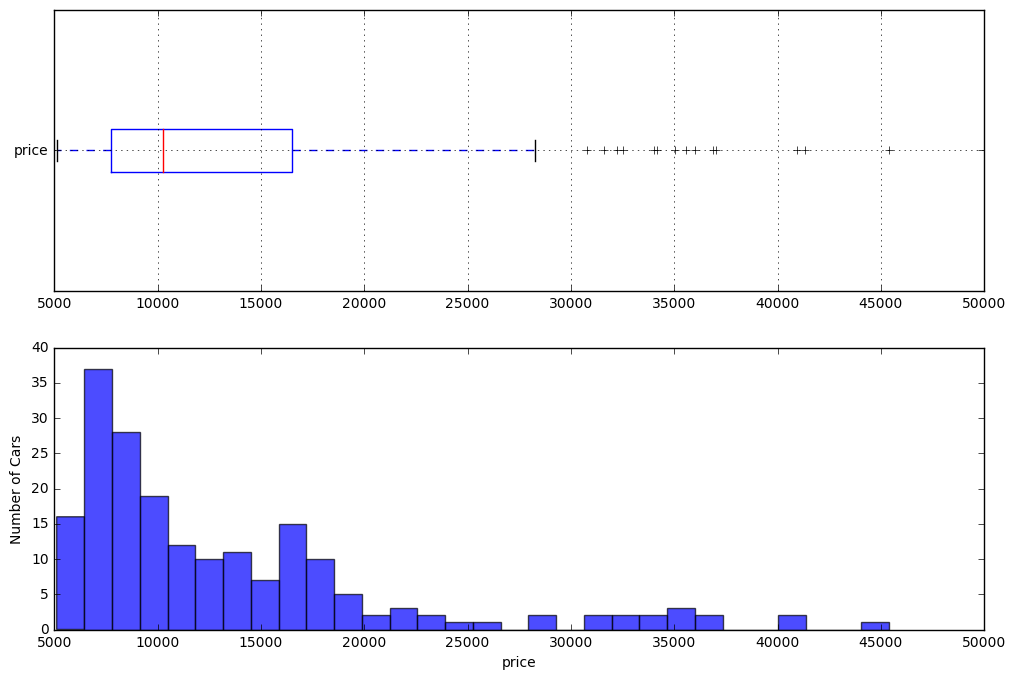

In [25]:
%matplotlib inline
plotstats(frame, 'price')

In [26]:
describe(frame, 'horsepower')

count     195.000000
mean      103.271795
std        37.869730
min        48.000000
25%        70.000000
median     95.000000
75%       116.000000
max       262.000000
Name: horsepower, dtype: float64

['horsepower']

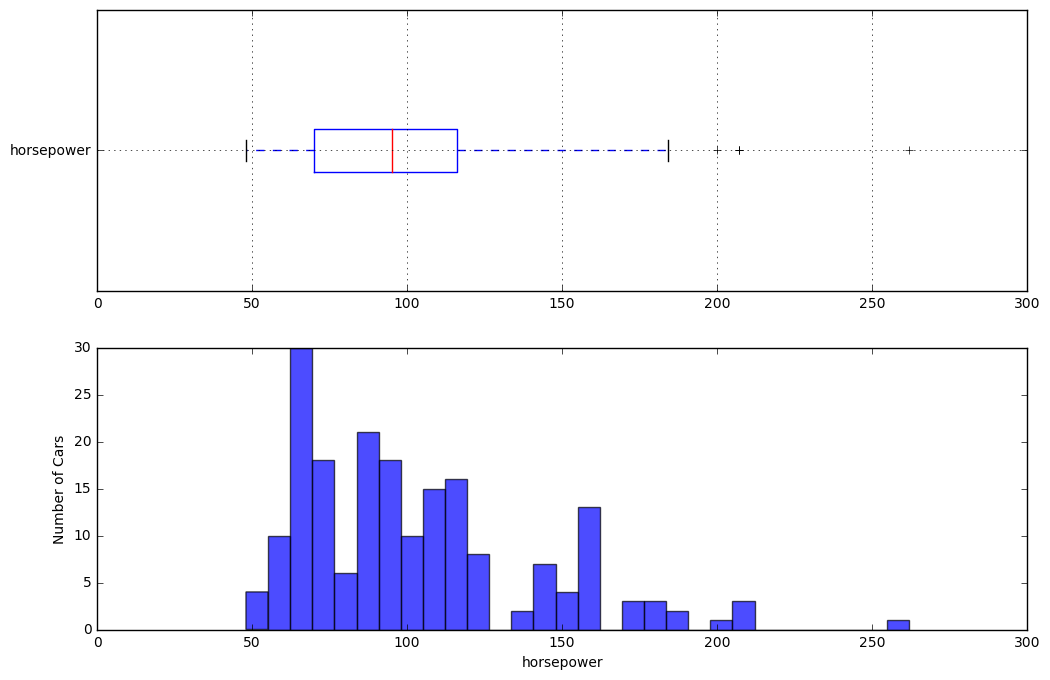

In [27]:
%matplotlib inline
plotstats(frame, 'horsepower')